## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Harsh\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('./QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1991 non-null   object
 1   TAG     1991 non-null   object
 2   POSTS   1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.columns = ['DATE', 'TAG', 'POSTS']

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [11]:
df.groupby('TAG').sum().sort_values(by='POSTS',ascending=False)

,DATE,POSTS
TAG,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1496210
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1361988
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,356799
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [12]:
df.groupby('TAG').count().sort_values(by='POSTS',ascending=False)

,DATE,POSTS
TAG,,
c#,145,145
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144
perl,144,144
php,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [14]:
df.DATE = pd.to_datetime(df.DATE)

In [15]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [17]:
temp_df = pd.get_dummies(df)
temp_df

,DATE,POSTS,TAG_assembly,TAG_c,TAG_c#,TAG_c++,TAG_delphi,TAG_go,TAG_java,TAG_javascript,TAG_perl,TAG_php,TAG_python,TAG_r,TAG_ruby,TAG_swift
0,2008-07-01,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,2008-08-01,8,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2008-08-01,162,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,2008-08-01,85,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,2008-08-01,124,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,2020-07-01,5694,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1987,2020-07-01,743,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1988,2020-07-01,775,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1989,2020-07-01,182,False,False,False,False,False,False,False,False,True,False,False,False,False,False


## Data Manipulation



In [19]:
temp_df = df.pivot(index='DATE',columns='TAG',values='POSTS')
temp_df.fillna(0, inplace=True)
temp_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [21]:
temp_df.shape

(145, 14)

In [26]:
temp_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [22]:
temp_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

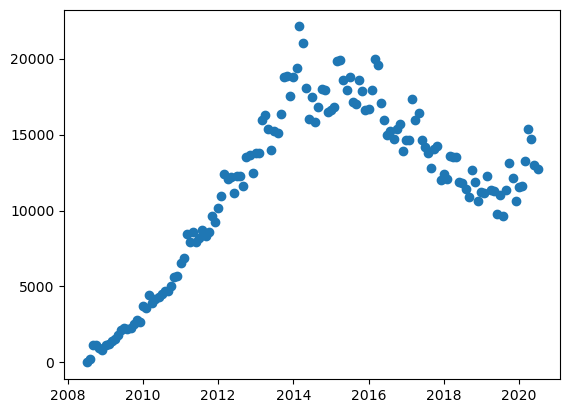

In [27]:
plt.scatter(temp_df.index,temp_df['java'])

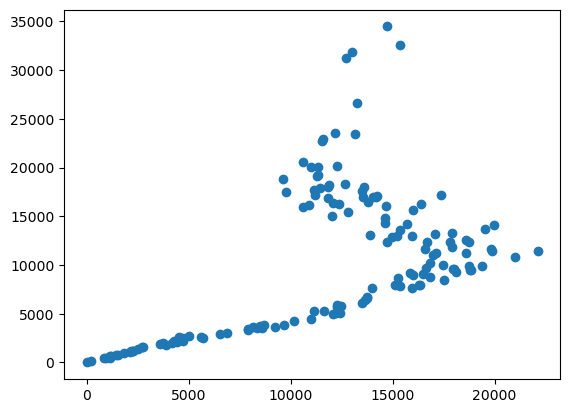

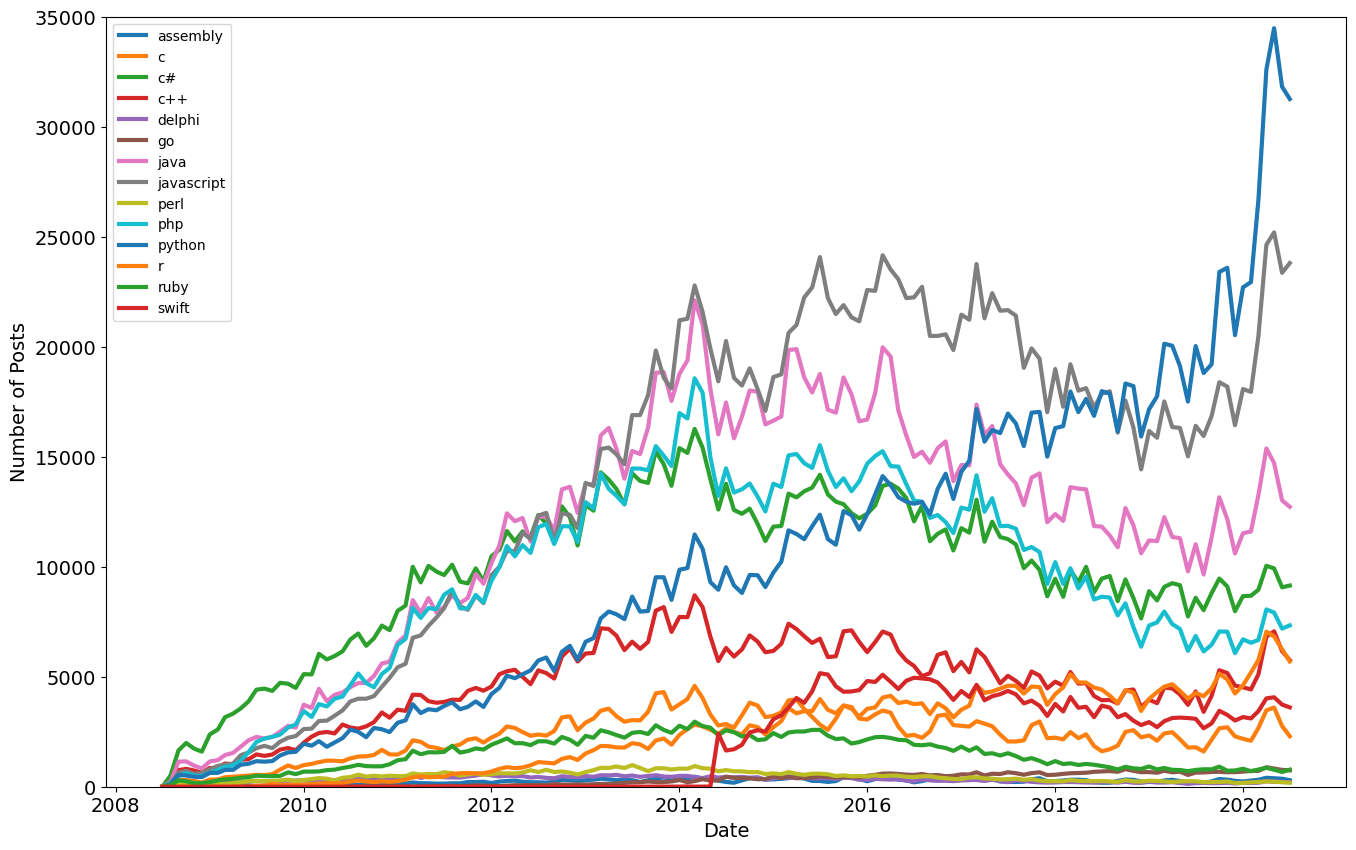

In [40]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in temp_df.columns:
    plt.plot(temp_df.index,temp_df[column],
            linewidth=3, label=temp_df[column].name)
    plt.legend()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

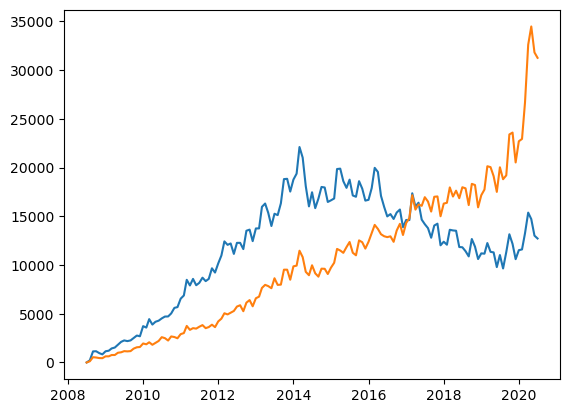

In [34]:
plt.plot(temp_df.index, temp_df.java)
plt.plot(temp_df.index, temp_df.python)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

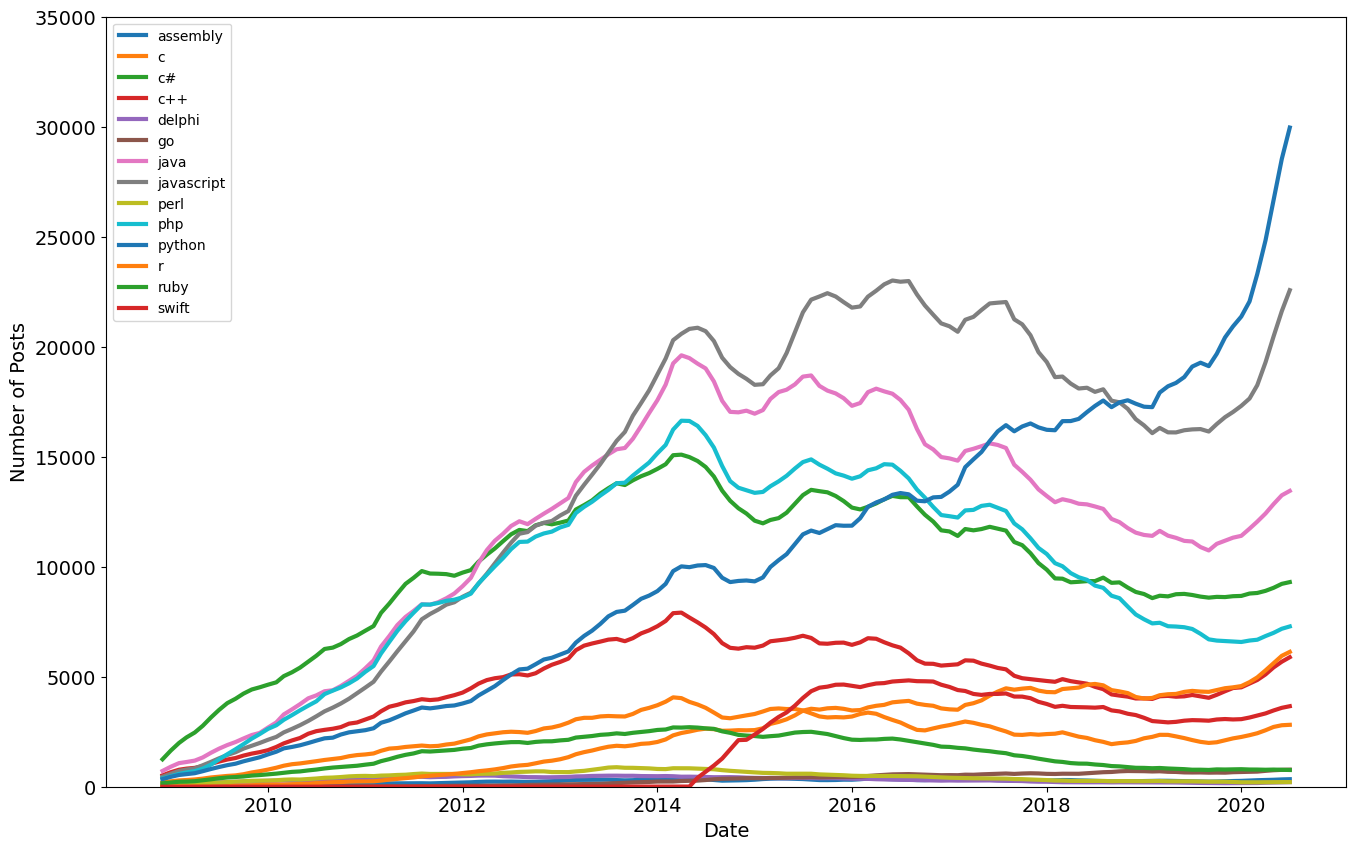

In [42]:
roll_df = temp_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index,roll_df[column],
            linewidth=3, label=roll_df[column].name)
    plt.legend()